In [12]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt #para graficar
import math
import time 
plt.rcParams["figure.figsize"] = (10,10) #tamaño de los gráficos: ancho x alto

In [13]:
def en_base_10(input: float, n: int) -> float:
    exponente: int = 0
    while abs (input) >= 1:
        exponente += 1
        input /= 10
    while abs(input) < 0 and input != 0:
        exponente -= 1
        input *= 10
    res = round(input, n)
    return  f"{res} * 10^{exponente}"

def raices(a: float, b: float, c: float, n: int) -> list[float, float]:
    r1: float = (-b + math.sqrt((b ** 2) - (4 * c * a)))/ (2 * a)
    r2: float = (-b ** 2 - ((b ** 2) - (4 * a * c)))/ (2 * (-b + math.sqrt((b ** 2) - 4*a*c)))
    x1: float = en_base_10(r1, n)
    x2: float = en_base_10(r2, n)
    return [x1, x2]

def funcion(k: float) -> float:
    return math.exp(-12)

def suma_hasta(f,x: float , N: int) -> float:
    suma = 0
    for i in range(0, N + 1, 1):
        suma += f(x, i)
    return suma 

def termino_taylor_exp(x: float, n: int) -> float:
    return (x ** n)/math.factorial(n)

def func(x):
    return x ** 2

exact_derivative = 2

def dhf(funcion, x: float,h: float ) -> float:
    return (funcion(x + h) - funcion(x))/ h

def seno(x: float):
    return np.sin(x)

def elementos(j: int) -> list[float]:
    lista = []
    for i in range(1, j + 1, 1):
        lista.append((10 ** i) * math.pi)
    return lista


In [14]:
def euler_explicito(funcion, t0, tn, h, y0: float):
    paso = int ((tn - t0)/(h))
    t = np.linspace(t0, tn, paso + 1)
    y = np.zeros(paso + 1)
    y[0] = y0
    for i in range(1, paso + 1):
        y[i] = y[i - 1] + h * funcion(t[i - 1], y[i - 1])
    return ((t, y))

def euler_implicito(funcion, t0, tn, h, y0: float, lamba: float):
    paso = int ((tn - t0)/(h))
    t = np.linspace(t0, tn, paso + 1)
    y = np.zeros(paso + 1)
    y[0] = y0
    for i in range(1, paso + 1, 1):
        y[i] = (y[i - 1]) / (1 - (lamba * h))
    return (t, y)


In [15]:
# defino el paso
def paso_euler_explicito(x, t, h, f):
  x_sig = x + h*f(t,x)
  return x_sig


# defino el método
def metodo_euler_explicito(x0, t0, h, f, cant_pasos):
  x = x0
  t = t0

  valores_x = np.array([]) #vector vacío
  valores_x = np.append(valores_x, x0) #agrego elemento al final del vector

  for i in range(0, cant_pasos, 1):
    x_sig = paso_euler_explicito(x, t, h, f) #uso la función que me calcula un paso

    valores_x = np.append(valores_x, x_sig) #agrego elemento al final del vector

    # actualizo para poder seguir calculando los siguientes
    t = t + h
    x = x_sig

  return valores_x

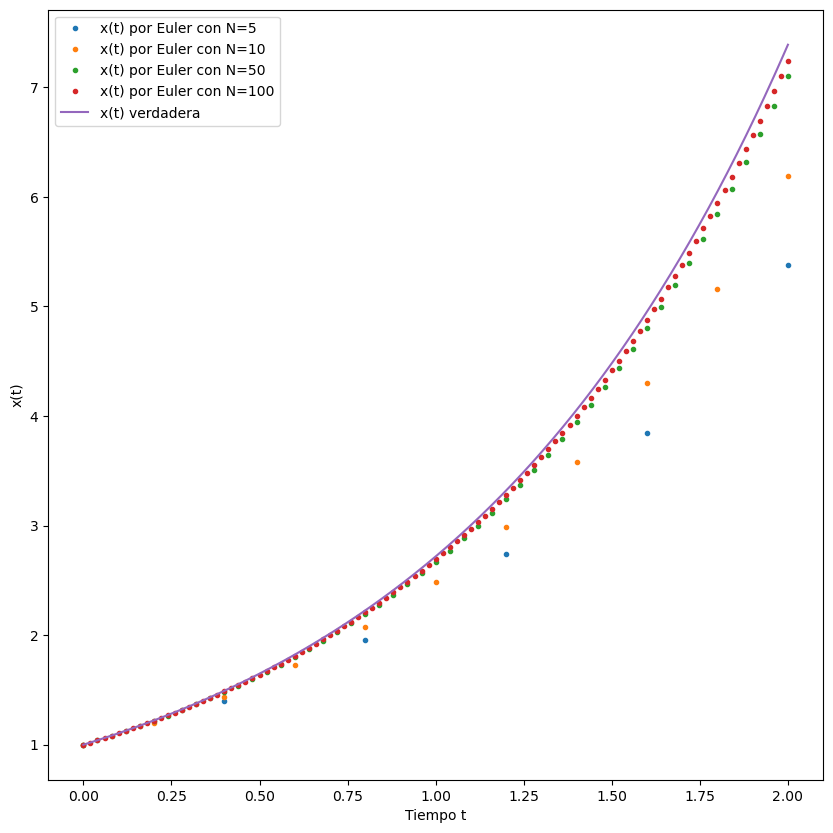

In [39]:
# Aproximo por Euler explícito la sol. de la ec. dif. que me dan.

def func_ejer(t,x):
  y = x
  return y

x0 = 1
t0 = 0
tf = 2

for N in [5, 10, 50, 100]:
  h = (tf-t0)/N
  # a los tiempos ya sé cómo calcularlos
  vals_t = np.linspace(t0, t0+N*h, N+1) #recordar el linspace: inicio, fin (inclusive), cantidad de valores equiespaciados
  vals_x = metodo_euler_explicito(x0, t0, h, func_ejer, N)
  plt.plot(vals_t ,vals_x, '.', label='x(t) por Euler con N={}'.format(N))

vals_t_graf = np.linspace(0,2,10000)
vals_x_func = np.exp(vals_t_graf)
plt.plot(vals_t_graf, vals_x_func, label='x(t) verdadera')
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.legend()

In [17]:
""" Ejemplo
Consideremos el PVI:
{x'(t) = tcos(x(t))
{x(0) = 3 """
""" Papel y lápiz: calcular el tamaño del paso a priori necesario para estimar 
 con un error menor a 
 usando el método de Euler. (Mirar error global de Euler de las diapos de la teórica).
Usar el método de Euler explícito para aproximar la solución del PVI con 
 entre 0 y 2, para el tamaño de paso averiguado en el ítem anterior. Graficar los resultados obtenidos. """


' Papel y lápiz: calcular el tamaño del paso a priori necesario para estimar \n con un error menor a \n usando el método de Euler. (Mirar error global de Euler de las diapos de la teórica).\nUsar el método de Euler explícito para aproximar la solución del PVI con \n entre 0 y 2, para el tamaño de paso averiguado en el ítem anterior. Graficar los resultados obtenidos. '

Cantidad de pasos 142857


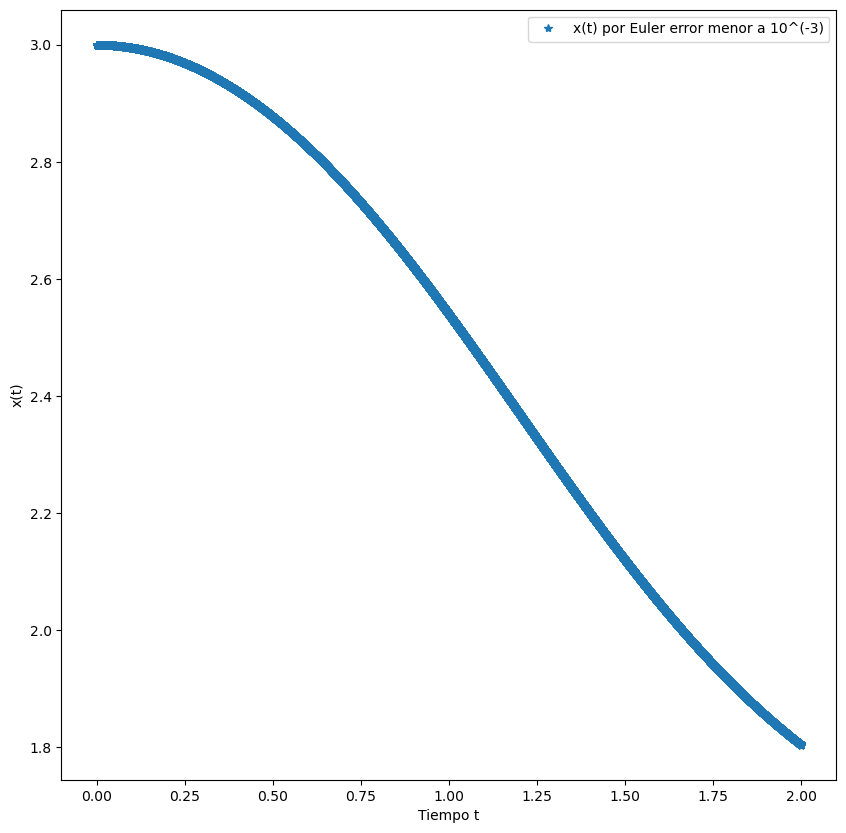

In [18]:
# defino la función
def func_ejer2(t,x):
  y = t*np.cos(x)
  return y


# aproximo la sol. por Euler explícito
x0 = 3
t0 = 0
tf = 2
h = 1.4*10**(-5)
# h = 10**(-6) #probar este y ver como aumenta MUCHO la cantidad de pasos
N = int( (tf-t0)/h ) #devuelve parte entera: detalle técnico para que N sea entero y el range no se queje.

vals_t = np.linspace(t0, t0+N*h, N+1)
vals_x = metodo_euler_explicito(x0, t0, h, func_ejer2, N)
plt.plot(vals_t ,vals_x, '*', label='x(t) por Euler error menor a 10^(-3)')
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.legend()

print('Cantidad de pasos', N) #¡son muchos! ¿por qué?

In [19]:
def paso_taylor(x, t, h, f, ft, fx):
  k = ft(t,x) + fx(t,x)*f(t,x)
  x_sig = x + h*f(t,x) + 0.5*(h**2)*k
  return x_sig


def metodo_taylor(x0, t0, h, f, ft, fx, cant_pasos):
  x = x0
  t = t0

  valores_x = np.array([]) #vector vacío
  valores_x = np.append(valores_x, x0) #agrego elemento al final

  valores_t = np.array([])
  valores_t = np.append(valores_t, t0) #agrego elemento al final

  for i in range(0,cant_pasos,1):
    x_sig = paso_taylor(x, t, h, f, ft, fx)

    valores_x = np.append(valores_x, x_sig) #agrego elemento al final del vector

    t_sig = t + h
    valores_t = np.append(valores_t, t_sig) #agrego elemento al final del vector

    t = t_sig
    x = x_sig

  return valores_t, valores_x

In [20]:
""" Ejemplo Taylor
 {x'(t) = tcos(x(t))
 { x(0) = 3

Usar el método de Taylor para aproximar la solución del PVI con 
 entre 0 y 2. Graficar los resultados obtenidos. """


" Ejemplo Taylor\n {x'(t) = tcos(x(t))\n { x(0) = 3\n\nUsar el método de Taylor para aproximar la solución del PVI con \n entre 0 y 2. Graficar los resultados obtenidos. "

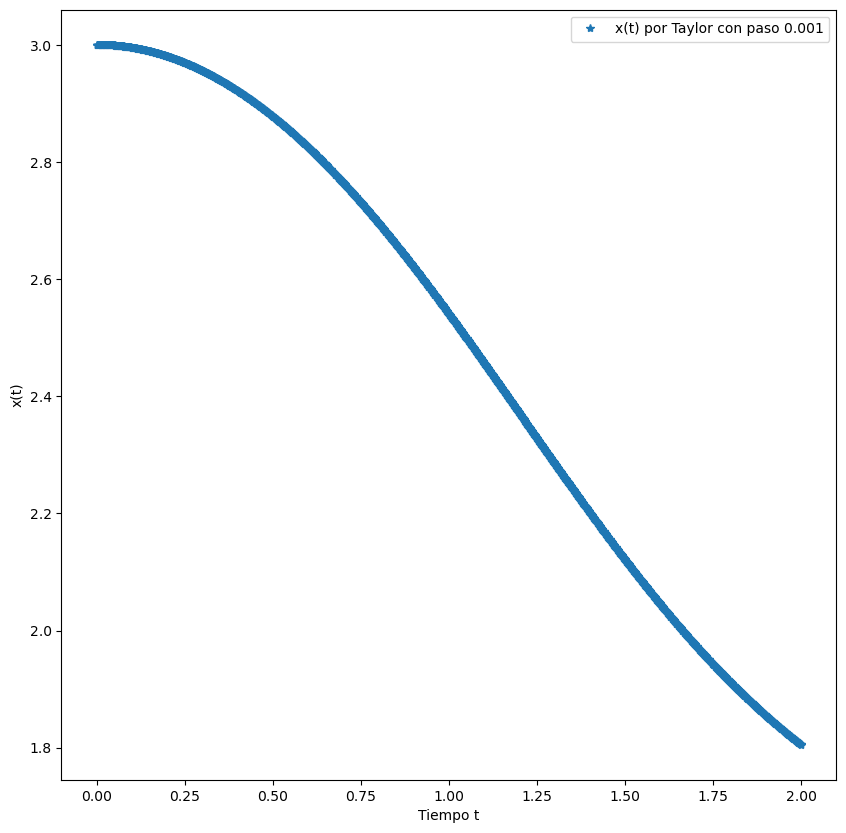

In [21]:
def func(t,x):
  y = t*np.cos(x)
  return y

def func_deriv_t(t,x):
  y = np.sin(x)
  return y

def func_deriv_x(t,x):
  y = (-1)*t*np.sin(x)
  return y


x0 = 3
t0 = 0
tf = 2
h = 10**(-3)
N = int( (tf-t0)/h ) #devuelve parte entera: detalle técnico para que N sea entero y el range no se queje.

vals_t, vals_x = metodo_taylor(x0, t0, h, func, func_deriv_t, func_deriv_x, N)
plt.plot(vals_t ,vals_x, '*', label='x(t) por Taylor con paso {}'.format(h))
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.legend()

In [30]:
""" metodo de Heun ( RUNGE KUTTA DE ORDEN 2)"""
def paso_heun(x, t, h, f):
    k1 = f(t, x)
    k2 = f(t + h, x + h * k1)
    x_sig = x + 0.5 * h * (k1 + k2)
    return x_sig

def metodo_heun(x0, t0, h, f, cant_pasos):
    x = x0
    t = t0
    valores_x = np.array([x0])  # Array para almacenar los valores de x
    valores_t = np.array([t0])  # Array para almacenar los valores de t
    for i in range(cant_pasos):
        x_sig = paso_heun(x, t, h, f)
        valores_x = np.append(valores_x, x_sig)  # Agregar el nuevo valor de x
        t = t + h
        valores_t = np.append(valores_t, t)  # Agregar el nuevo valor de t
        x = x_sig
    return valores_t, valores_x
#x0 = 
#t0 = 
#tf = 
#h = 
#N = 



In [31]:
""" Runge-Kutta de orden 4 """
def paso_runge_kutta_4(y, t, h, f):
    k1 = f(t, y)
    k2 = f(t + 0.5*h, y + 0.5*h*k1)
    k3 = f(t + 0.5*h, y + 0.5*h*k2)
    k4 = f(t + h, y + h*k3)
    y_sig = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y_sig

def metodo_runge_kutta_4(y0, t0, h, f, cant_pasos):
    y = y0
    t = t0
    valores_y = np.array([y0])  # Array para almacenar los valores de y
    for i in range(cant_pasos):
        y_sig = paso_runge_kutta_4(y, t, h, f)
        valores_y = np.append(valores_y, y_sig)  # Agregar el nuevo valor de y
        
        t = t + h
        y = y_sig

    
    return valores_y

In [33]:
""" Euler para sistemas """
def paso_euler_sistemas(z, t, h, f):
    z_sig = z + h*f(t,z) #ojo tanto z como f(t,z) pueden ser un vectores
    return z_sig


def metodo_euler_sistemas(z0, t0, h, f, cant_pasos):
    z = z0
    t = t0

    valores_z = np.array([]) #vector vacío
    valores_z = np.append(valores_z, z0) #agrego elemento al final

    for i in range(cant_pasos):
        z_sig = paso_euler_sistemas(z, t, h, f)
        #el vstack es para que queden en columnas: col 1 es vals de x1, col 2 es vals de x2, etc.
        #o dicho de otra forma como vstack apila verticalmente (por eso vstack) cada fila es la solución (numérica) del sistema a un tiempo
        valores_z = np.vstack( (valores_z, z_sig) )

        t = t + h
        z = z_sig

    return valores_z

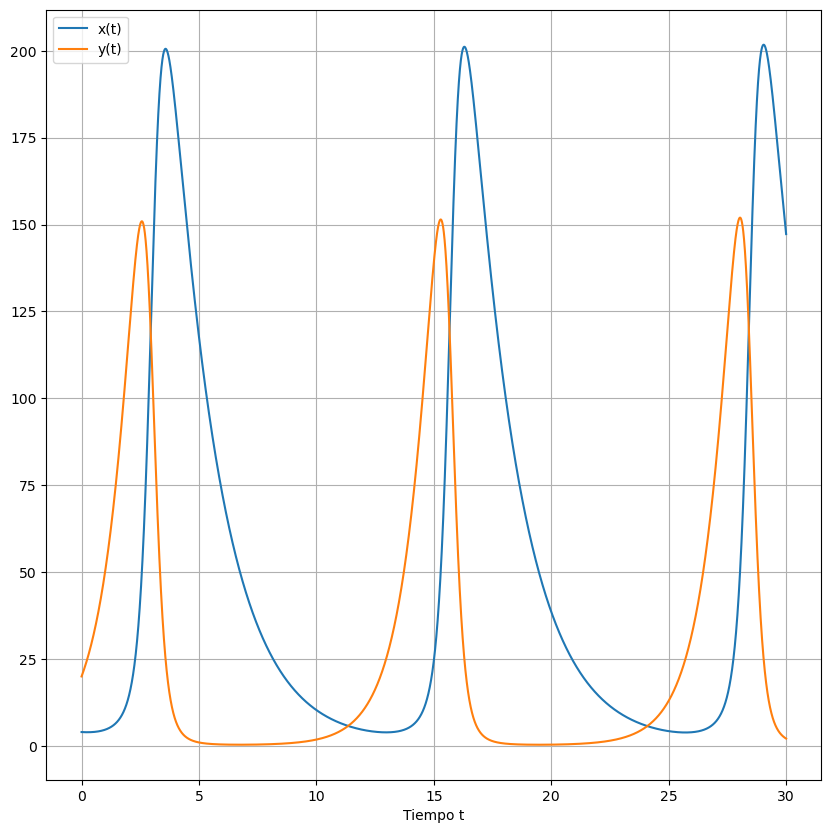

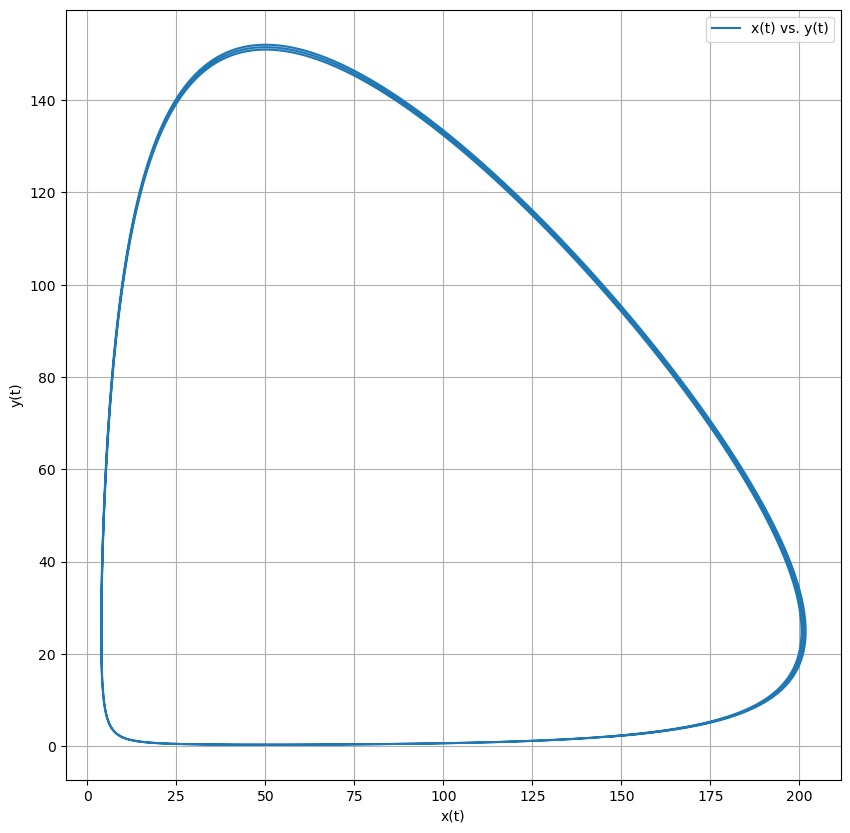

In [40]:
"""Sistema predador-presa (+ diagrama de fase)
Estudiamos el sistema (el PVI mejor dicho):
x' = 0,5x+0,02xy
y' = y-0,02xy
x(0) = 4
y(0) = 20
 
Donde x es la población de predadores, la de presas. Probar con h=10**-3  y con h=10**-1 y analizar qué ocurre. """

def f(t,z): #ojo z es un vector
    x = z[0]
    y = z[1]
    f1 = -0.5*x+0.02*x*y
    f2 = y - 0.02*x*y
    f = np.array([f1,f2])
    return f


x0 = 4
y0 = 20
z0 = np.array([x0, y0])

t0 = 0
tf = 30 #experimentar

h = 10**(-3)
# poner h = 10**(-1) y ver qué pasa
N = int( (tf-t0)/h )

vals_t = np.linspace(t0, t0+N*h, N+1)
vals_z = metodo_euler_sistemas(z0, t0, h, f, N)


# Grafico x(t)
plt.plot(vals_t, vals_z[:,0], label='x(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('x(t)')
plt.legend()
plt.grid()


# Grafico y(t)
plt.plot(vals_t, vals_z[:,1], label='y(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('y(t)')
plt.legend()
plt.show()


# grafico diagrama de fases
plt.plot(vals_z[:,0], vals_z[:,1], label='x(t) vs. y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()

In [41]:
""" Runge-Kutta de orden 4 (PARA SISTEMAS) """
def paso_rk4_sistemas(z, t, h, f):
    k1 = f(t,z)
    k2 = f(t + 0.5*h, z + 0.5*h*k1)
    k3 = f(t + 0.5*h, z + 0.5*h*k2)
    k4 = f(t + h, z + h*k3)
    z_sig = z + (h/6)*(k1+2*k2+2*k3+k4)
    return z_sig


def metodo_rk4_sistemas(z0, t0, h, f, cant_pasos):
    z = z0
    t = t0

    valores_z = np.array([]) #vector vacío
    valores_z = np.append(valores_z, z0) #agrego elemento al final

    for i in range(cant_pasos):
        z_sig = paso_rk4_sistemas(z, t, h, f)
        #el vstack es para que queden en columnas: col 1 es vals de x, col 2 es vals de y
        valores_z = np.vstack( (valores_z, z_sig) )

        t = t + h
        z = z_sig

    return valores_z

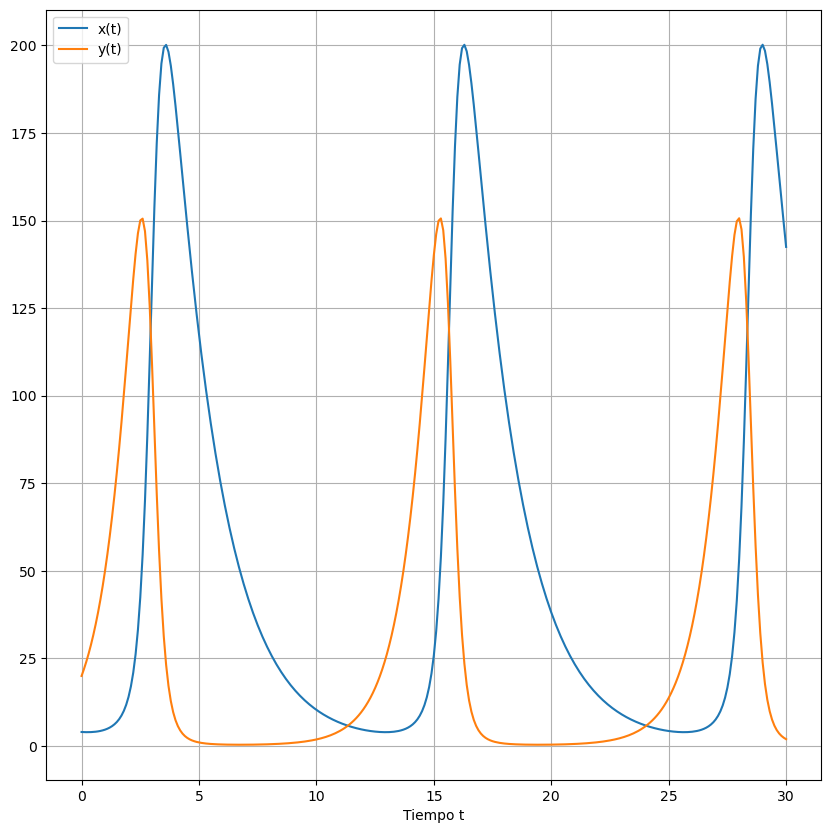

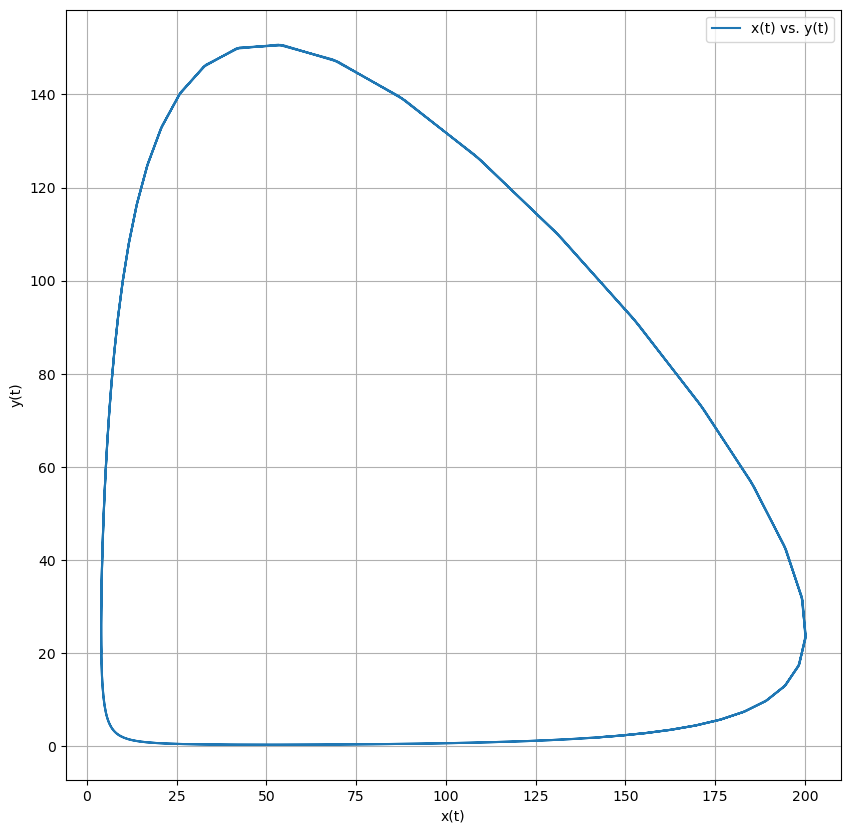

In [42]:
"""Ejemplo Runge-Kutta orden 4 para sistemas
Sistema predador-presa (+ diagramas de fase)
Estudiamos el sistema (el PVI mejor dicho):
 x' = -0,5x+0,02xy
 y' = y-0,02xy
 x(0) = 4
 y(0) = 20
 
Donde  es la población de predadores,  la de presas. x(0) = 4 ,y(0) = 20 .Probar con h = 10**-1  y comparar contra lo ocurrido con Euler. """

def f(t,z): #ojo z es un vector
    x = z[0]
    y = z[1]
    f1 = -0.5*x+0.02*x*y
    f2 = y - 0.02*x*y
    f = np.array([f1,f2])
    return f


x0 = 4
y0 = 20
z0 = np.array([x0, y0])

t0 = 0
tf = 30 #experimentar

h = 10**(-1)
N = int( (tf-t0)/h )

vals_t = np.linspace(t0, t0+N*h, N+1)
vals_z = metodo_rk4_sistemas(z0, t0, h, f, N)


# Grafico x(t)
plt.plot(vals_t, vals_z[:,0], label='x(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('x(t)')
plt.legend()
plt.grid()


# Grafico y(t)
plt.plot(vals_t, vals_z[:,1], label='y(t)')
plt.xlabel('Tiempo t')
# plt.ylabel('y(t)')
plt.legend()
plt.show()


# grafico diagrama de fases
plt.plot(vals_z[:,0], vals_z[:,1], label='x(t) vs. y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()